In [29]:
%reload_ext autoreload
%autoreload 2

import brian2 as b2
import brian2hears as b2h

import dill
import matplotlib.pyplot as plt
import numpy as np


from analyze import sound_analysis as SA
from cochleas.consts import CFMAX, CFMIN
from utils.custom_sounds import Tone, WhiteNoise
from cochleas.anf_utils import TC_COC_KEY
from utils.log import logger, tqdm

from analyze.report import draw_spikes_single_pop, calculate_vector_strength_from_result, calculate_vector_strength_from_result_polar, draw_rate_vs_angle

from upload.upload_sim_res import delete_from_gcs, download_from_gcs, upload_to_gcs, list_blob_names

import os

In [60]:
list_blob_names()

Name: /home/ubuntu/polithesis/results/angles2rates/tone_0.1.kHz_70dB&TanCarney&ild_only.pic, Size: 2078499091, Updated: 2025-03-26 16:21:52.289000+00:00
Name: /home/ubuntu/polithesis/results/angles2rates/tone_0.1.kHz_70dB&TanCarney&itd_only.pic, Size: 2078233853, Updated: 2025-03-26 14:08:06.120000+00:00
Name: /home/ubuntu/polithesis/results/angles2rates/tone_0.1.kHz_70dB&TanCarney&itd_only_no_MSO_inh.pic, Size: 2137395599, Updated: 2025-03-28 13:37:04.005000+00:00
Name: /home/ubuntu/polithesis/results/angles2rates/tone_0.1.kHz_70dB&TanCarney&subject_1.pic, Size: 1870642491, Updated: 2025-03-26 14:01:22.762000+00:00
Name: /home/ubuntu/polithesis/results/angles2rates/tone_0.1.kHz_70dB&TanCarney&subject_1_no_MSO_inh.pic, Size: 1921929992, Updated: 2025-03-28 13:32:10.891000+00:00
Name: /home/ubuntu/polithesis/results/angles2rates/tone_0.1.kHz_70dB&TanCarney&subject_2.pic, Size: 1924618088, Updated: 2025-03-26 14:06:21.526000+00:00
Name: /home/ubuntu/polithesis/results/angles2rates/tone_1

<Bucket: sim-results-localization>
<Blob: sim-results-localization, /home/ubuntu/polithesis/results/angles2rates/tone_0.1.kHz_70dB&TanCarney&subject_1.pic, None>
Downloaded /home/ubuntu/polithesis/results/angles2rates/tone_0.1.kHz_70dB&TanCarney&subject_1.pic to /home/ubuntu/polithesis/results/angles2rates/tone_0.1.kHz_70dB&TanCarney&subject_1.pic
2025-03-28 13:25:50,923 [DEBUG]  {'title': '/home/ubuntu/polithesis/results/angles2rates/tone_0.1.kHz_70dB&TanCarney&subject_1.pic', 'show_pops': ['parrot_ANF', 'GBC', 'SBC', 'LNTBC', 'MNTBC', 'LSO', 'MSO'], 'rate': False, 'hist_logscale': True}
2025-03-28 13:25:50,926 [DEBUG]  simulation time=1. s


pop: 100%|██████████| 7/7 [00:38<00:00,  5.47s/it]


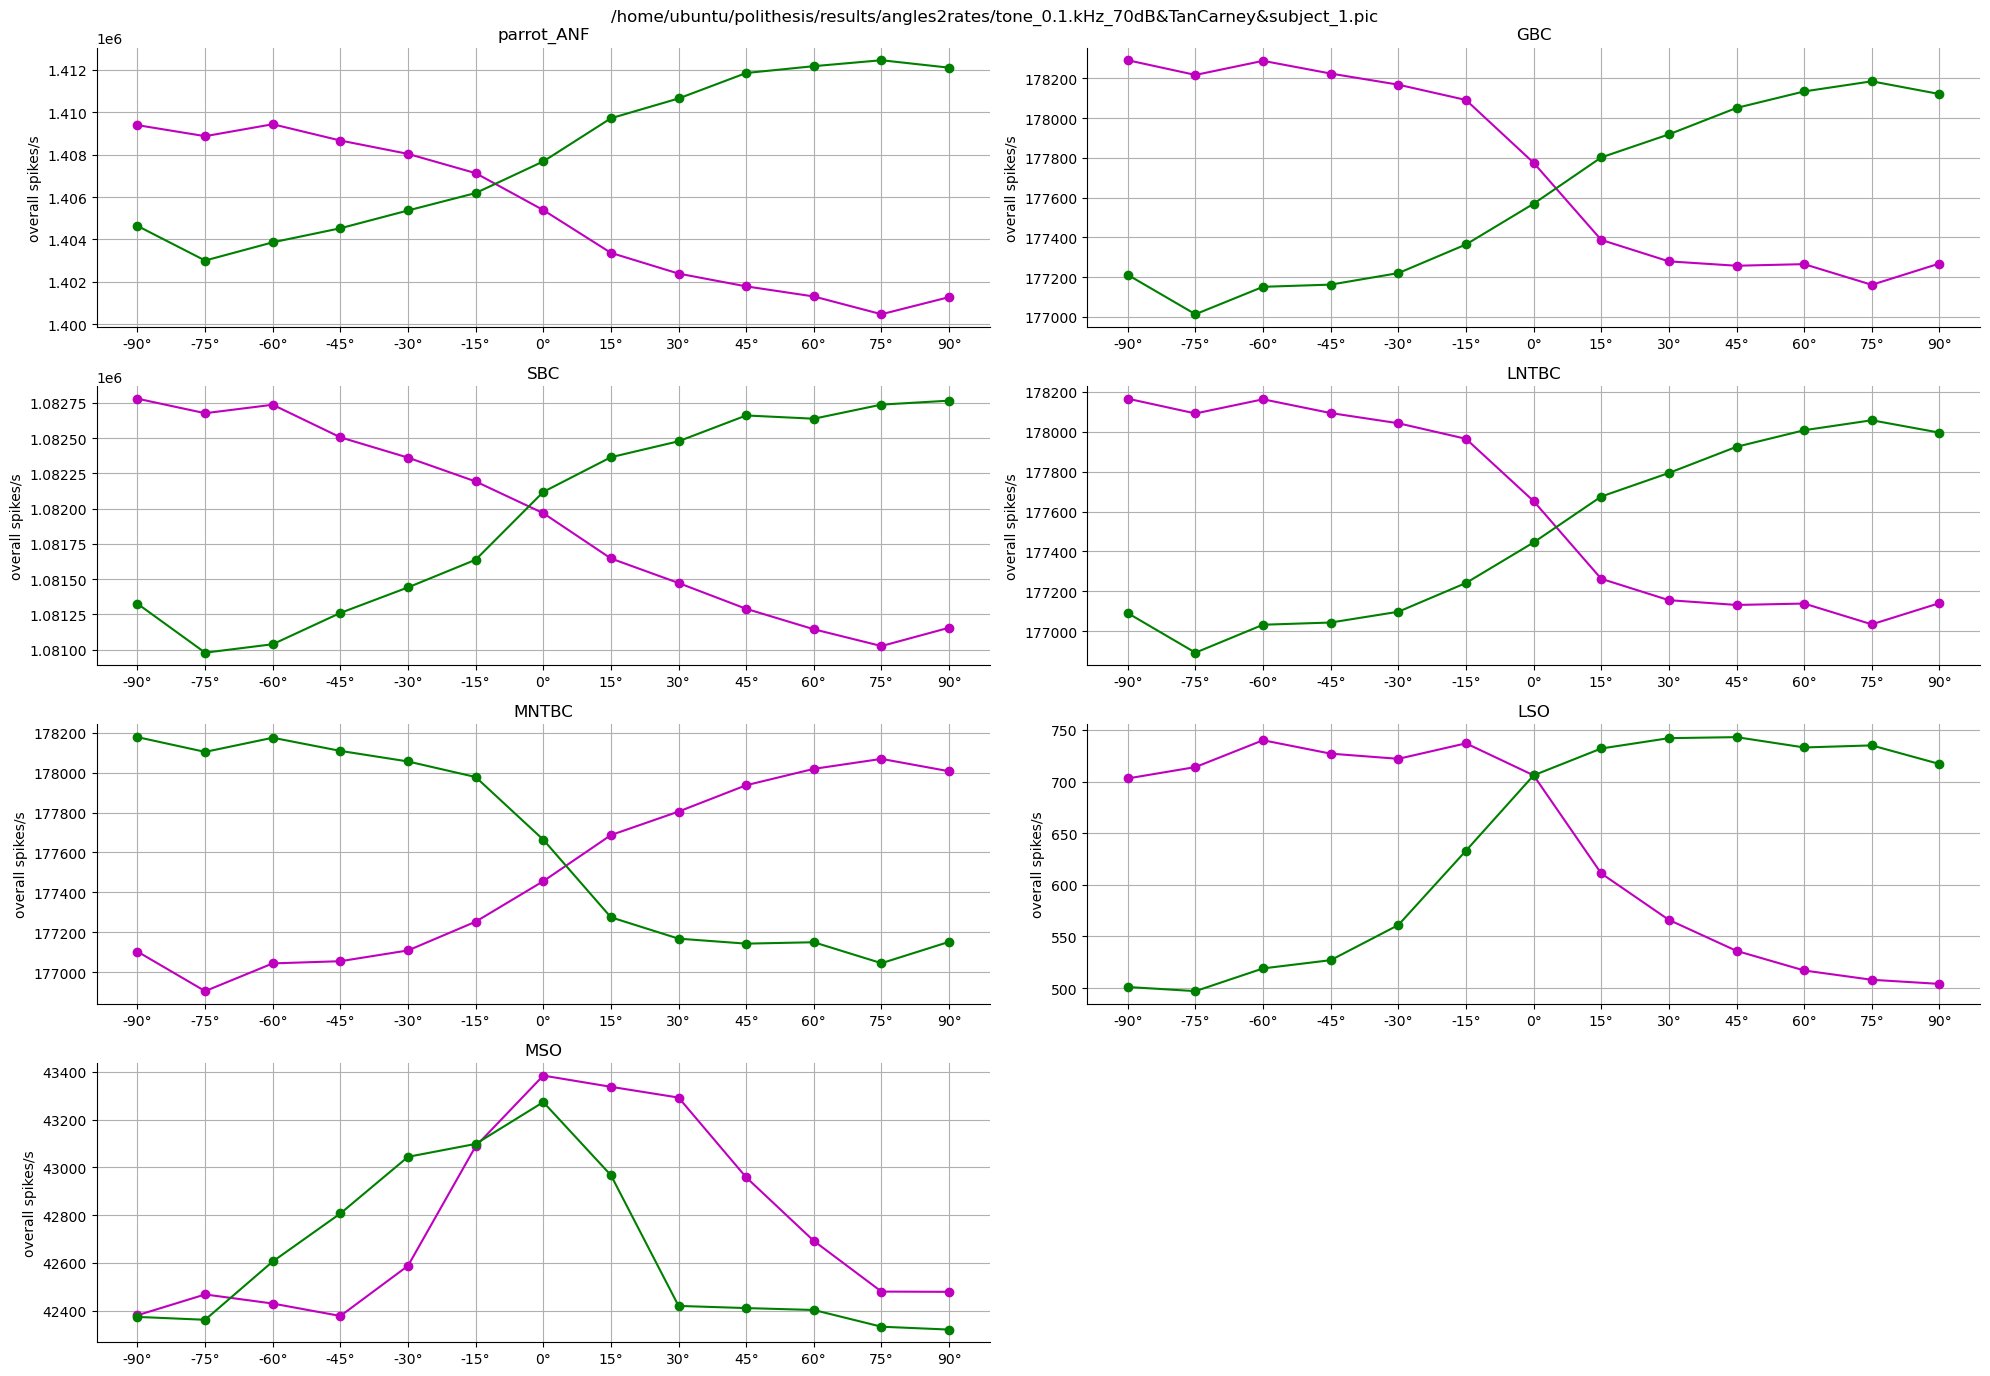

In [42]:
result_path = '/home/ubuntu/polithesis/results/angles2rates/tone_0.1.kHz_70dB&TanCarney&subject_1.pic'

if not os.path.exists(result_path):
    download_from_gcs(result_path, result_path)

with open(result_path, "rb") as f:
    res = dill.load(f, ignore=True)

draw_rate_vs_angle(
    res,
    result_path,
    rate=False,
    hist_logscale=True,
    show_pops= ["parrot_ANF", "GBC", "SBC", "LNTBC", "MNTBC", "LSO", "MSO"],
    show_hist=False
)

os.unlink(result_path)

<Bucket: sim-results-localization>
<Blob: sim-results-localization, /home/ubuntu/polithesis/results/angles2rates/tone_100.Hz_70dB&TanCarney&subject_1_no_MSO_inh.pic, None>
Downloaded /home/ubuntu/polithesis/results/angles2rates/tone_100.Hz_70dB&TanCarney&subject_1_no_MSO_inh.pic to /home/ubuntu/polithesis/results/angles2rates/tone_100.Hz_70dB&TanCarney&subject_1_no_MSO_inh.pic
2025-03-28 13:28:57,936 [DEBUG]  {'title': '/home/ubuntu/polithesis/results/angles2rates/tone_100.Hz_70dB&TanCarney&subject_1_no_MSO_inh.pic', 'show_pops': ['parrot_ANF', 'GBC', 'SBC', 'LNTBC', 'MNTBC', 'LSO', 'MSO'], 'rate': False, 'hist_logscale': True}
2025-03-28 13:28:57,938 [DEBUG]  simulation time=1. s


pop: 100%|██████████| 7/7 [00:40<00:00,  5.80s/it]


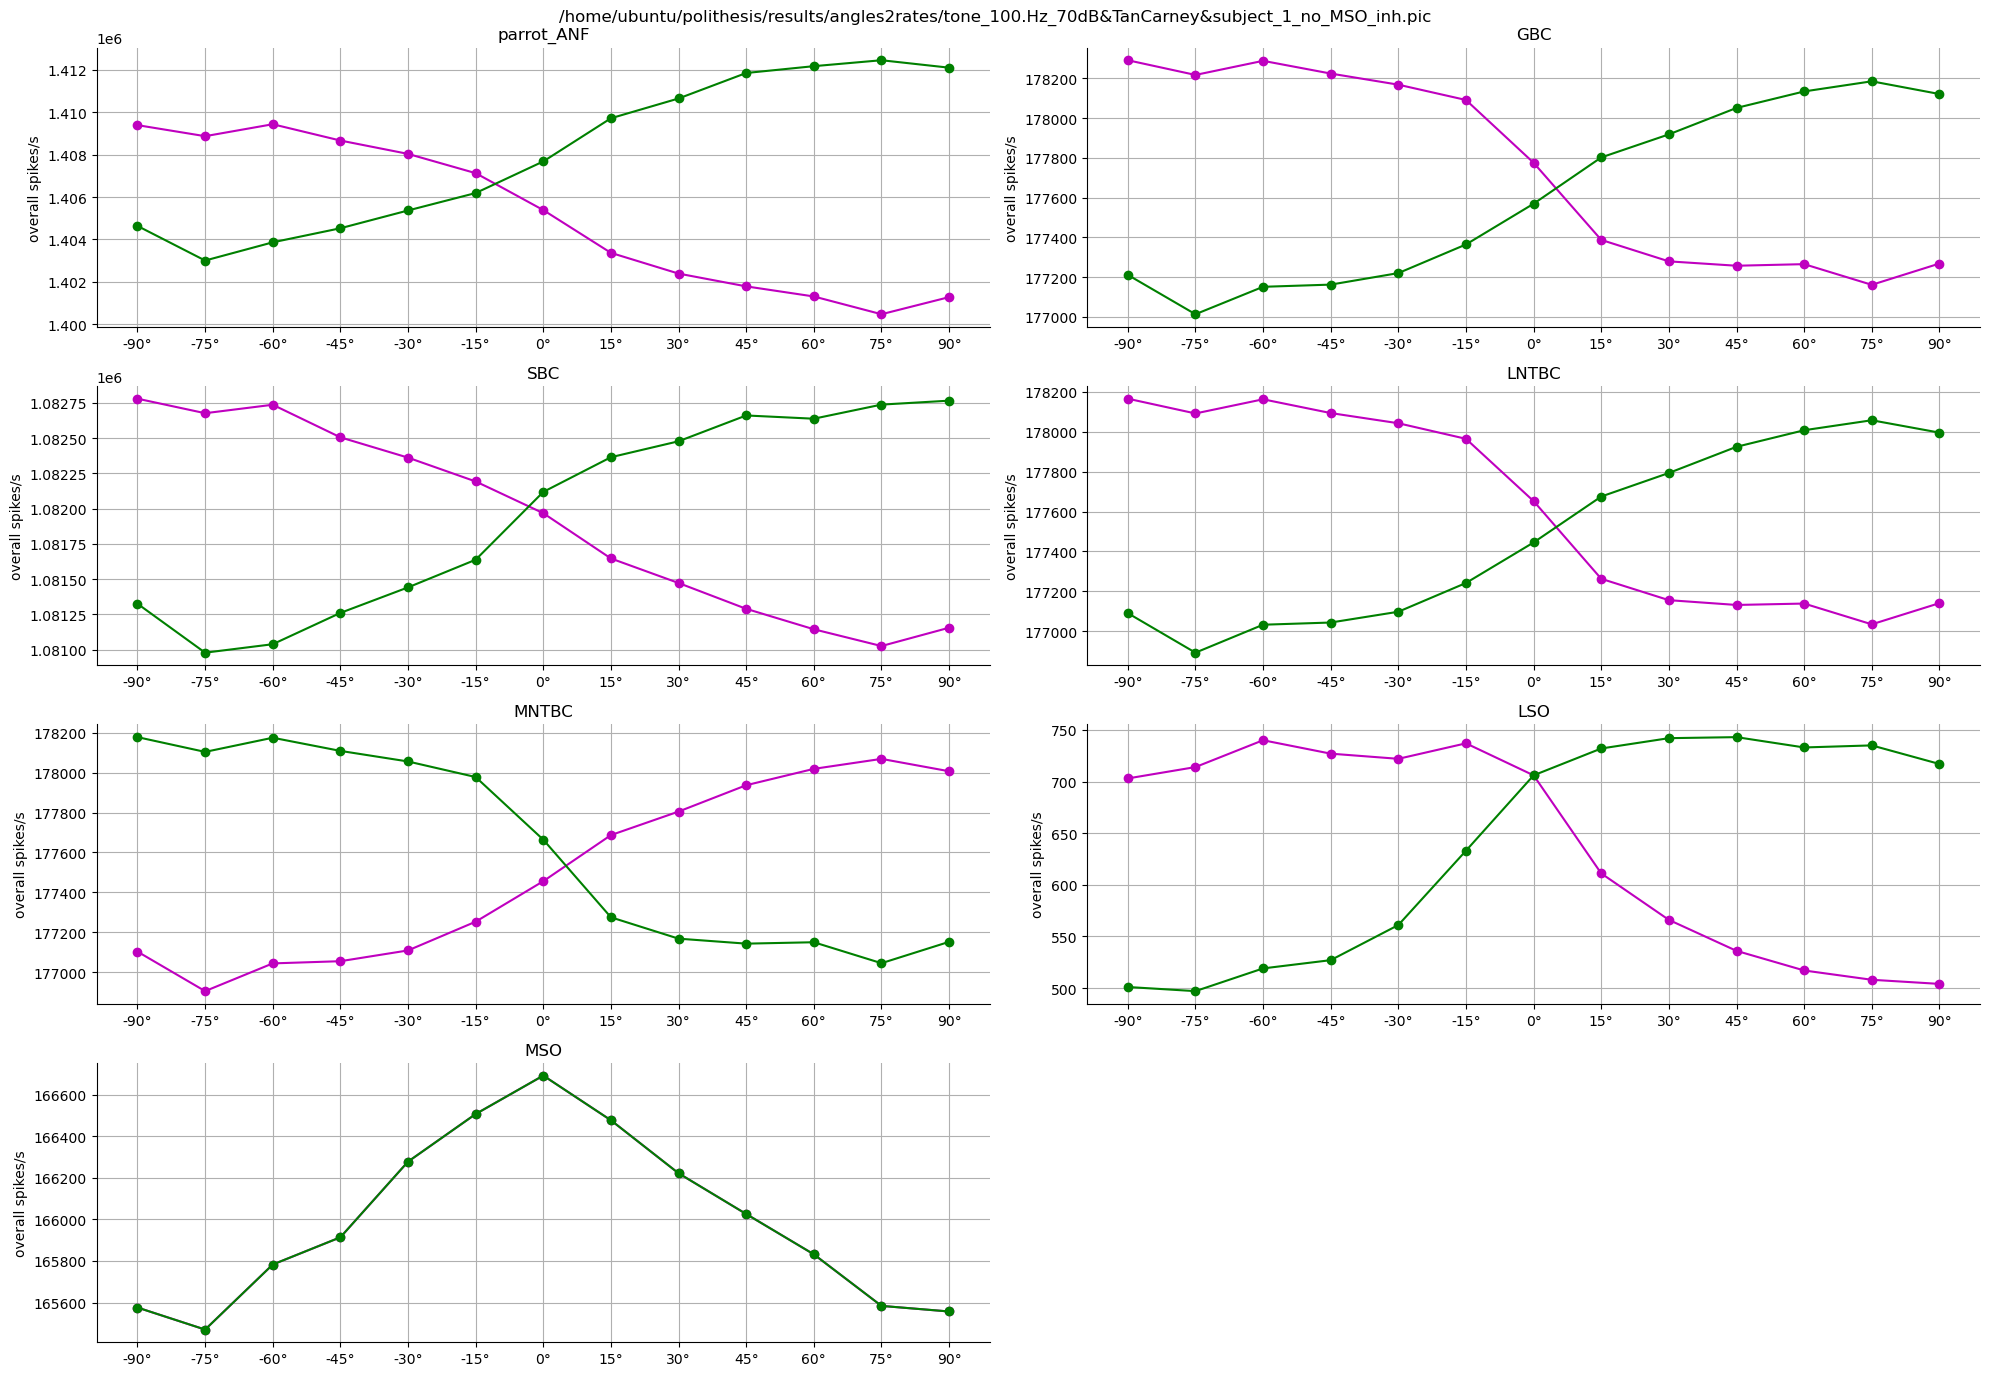

In [48]:
result_path = '/home/ubuntu/polithesis/results/angles2rates/tone_0.1.kHz_70dB&TanCarney&subject_1_no_MSO_inh.pic'

if not os.path.exists(result_path):
    download_from_gcs(result_path, result_path)

with open(result_path, "rb") as f:
    res = dill.load(f, ignore=True)

draw_rate_vs_angle(
    res,
    result_path,
    rate=False,
    hist_logscale=True,
    show_pops= ["parrot_ANF", "GBC", "SBC", "LNTBC", "MNTBC", "LSO", "MSO"],
    show_hist=False
)

os.unlink(result_path)

<Bucket: sim-results-localization>
<Blob: sim-results-localization, /home/ubuntu/polithesis/results/angles2rates/tone_0.1.kHz_70dB&TanCarney&itd_only.pic, None>
Downloaded /home/ubuntu/polithesis/results/angles2rates/tone_0.1.kHz_70dB&TanCarney&itd_only.pic to /home/ubuntu/polithesis/results/angles2rates/tone_0.1.kHz_70dB&TanCarney&itd_only.pic
2025-03-28 13:33:21,531 [DEBUG]  {'title': '/home/ubuntu/polithesis/results/angles2rates/tone_0.1.kHz_70dB&TanCarney&itd_only.pic', 'show_pops': ['parrot_ANF', 'GBC', 'SBC', 'LNTBC', 'MNTBC', 'LSO', 'MSO'], 'rate': False, 'hist_logscale': True}
2025-03-28 13:33:21,533 [DEBUG]  simulation time=1. s


pop: 100%|██████████| 7/7 [00:42<00:00,  6.08s/it]


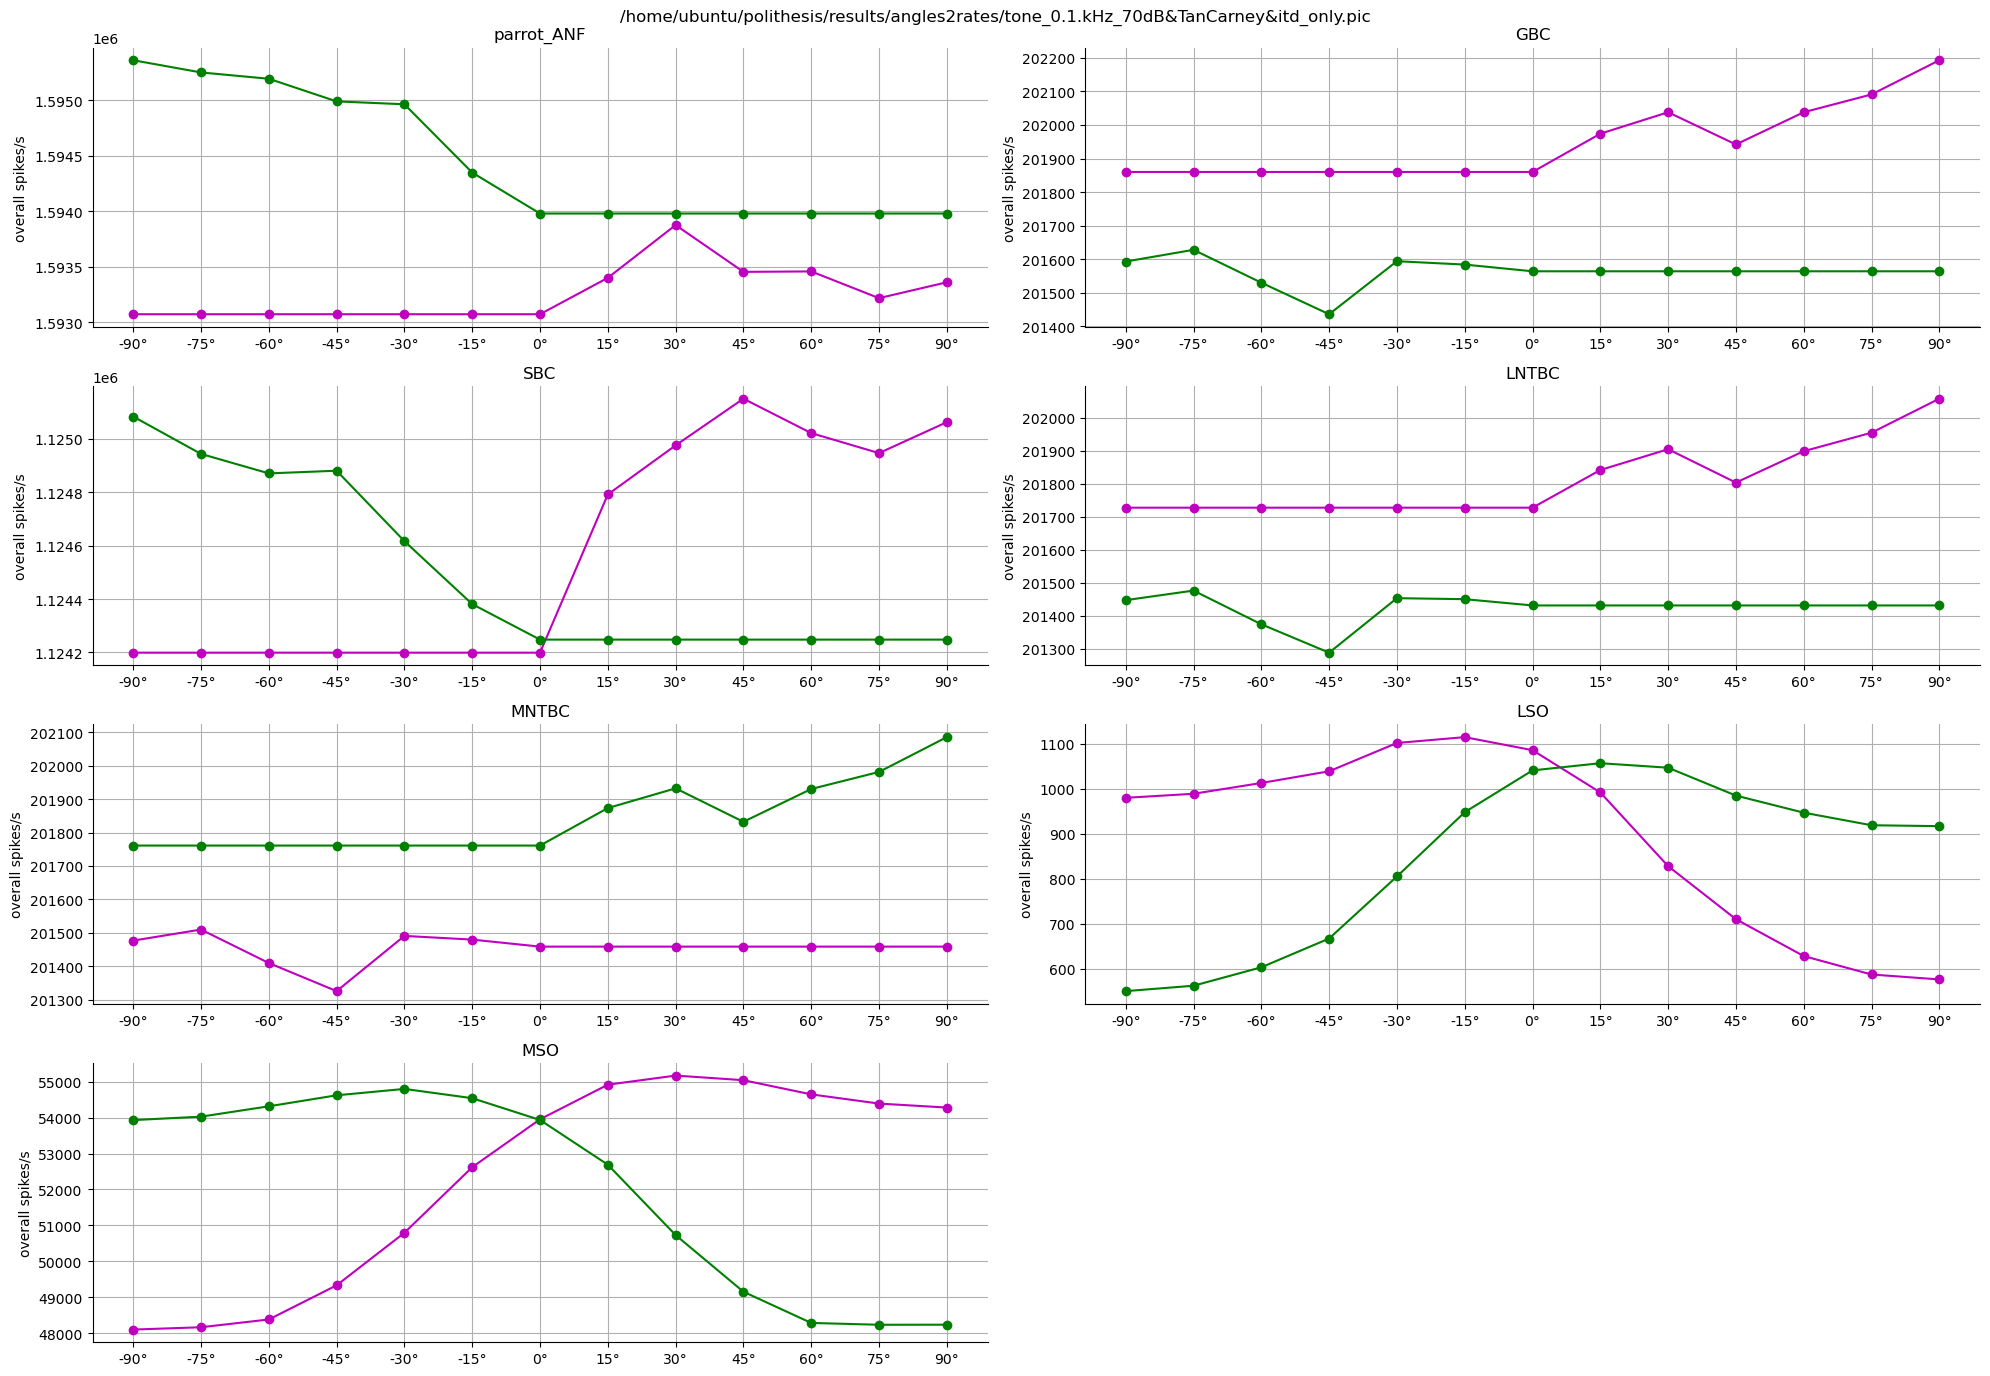

In [54]:
result_path = '/home/ubuntu/polithesis/results/angles2rates/tone_0.1.kHz_70dB&TanCarney&itd_only.pic'

if not os.path.exists(result_path):
    download_from_gcs(result_path, result_path)

with open(result_path, "rb") as f:
    res = dill.load(f, ignore=True)

draw_rate_vs_angle(
    res,
    result_path,
    rate=False,
    hist_logscale=True,
    show_pops= ["parrot_ANF", "GBC", "SBC", "LNTBC", "MNTBC", "LSO", "MSO"],
    show_hist=False
)

os.unlink(result_path)

<Bucket: sim-results-localization>
<Blob: sim-results-localization, /home/ubuntu/polithesis/results/angles2rates/tone_100.Hz_70dB&TanCarney&itd_only_no_MSO_inh.pic, None>
Downloaded /home/ubuntu/polithesis/results/angles2rates/tone_100.Hz_70dB&TanCarney&itd_only_no_MSO_inh.pic to /home/ubuntu/polithesis/results/angles2rates/tone_100.Hz_70dB&TanCarney&itd_only_no_MSO_inh.pic
2025-03-28 13:34:21,038 [DEBUG]  {'title': '/home/ubuntu/polithesis/results/angles2rates/tone_100.Hz_70dB&TanCarney&itd_only_no_MSO_inh.pic', 'show_pops': ['parrot_ANF', 'GBC', 'SBC', 'LNTBC', 'MNTBC', 'LSO', 'MSO'], 'rate': False, 'hist_logscale': True}
2025-03-28 13:34:21,040 [DEBUG]  simulation time=1. s


pop: 100%|██████████| 7/7 [00:43<00:00,  6.16s/it]


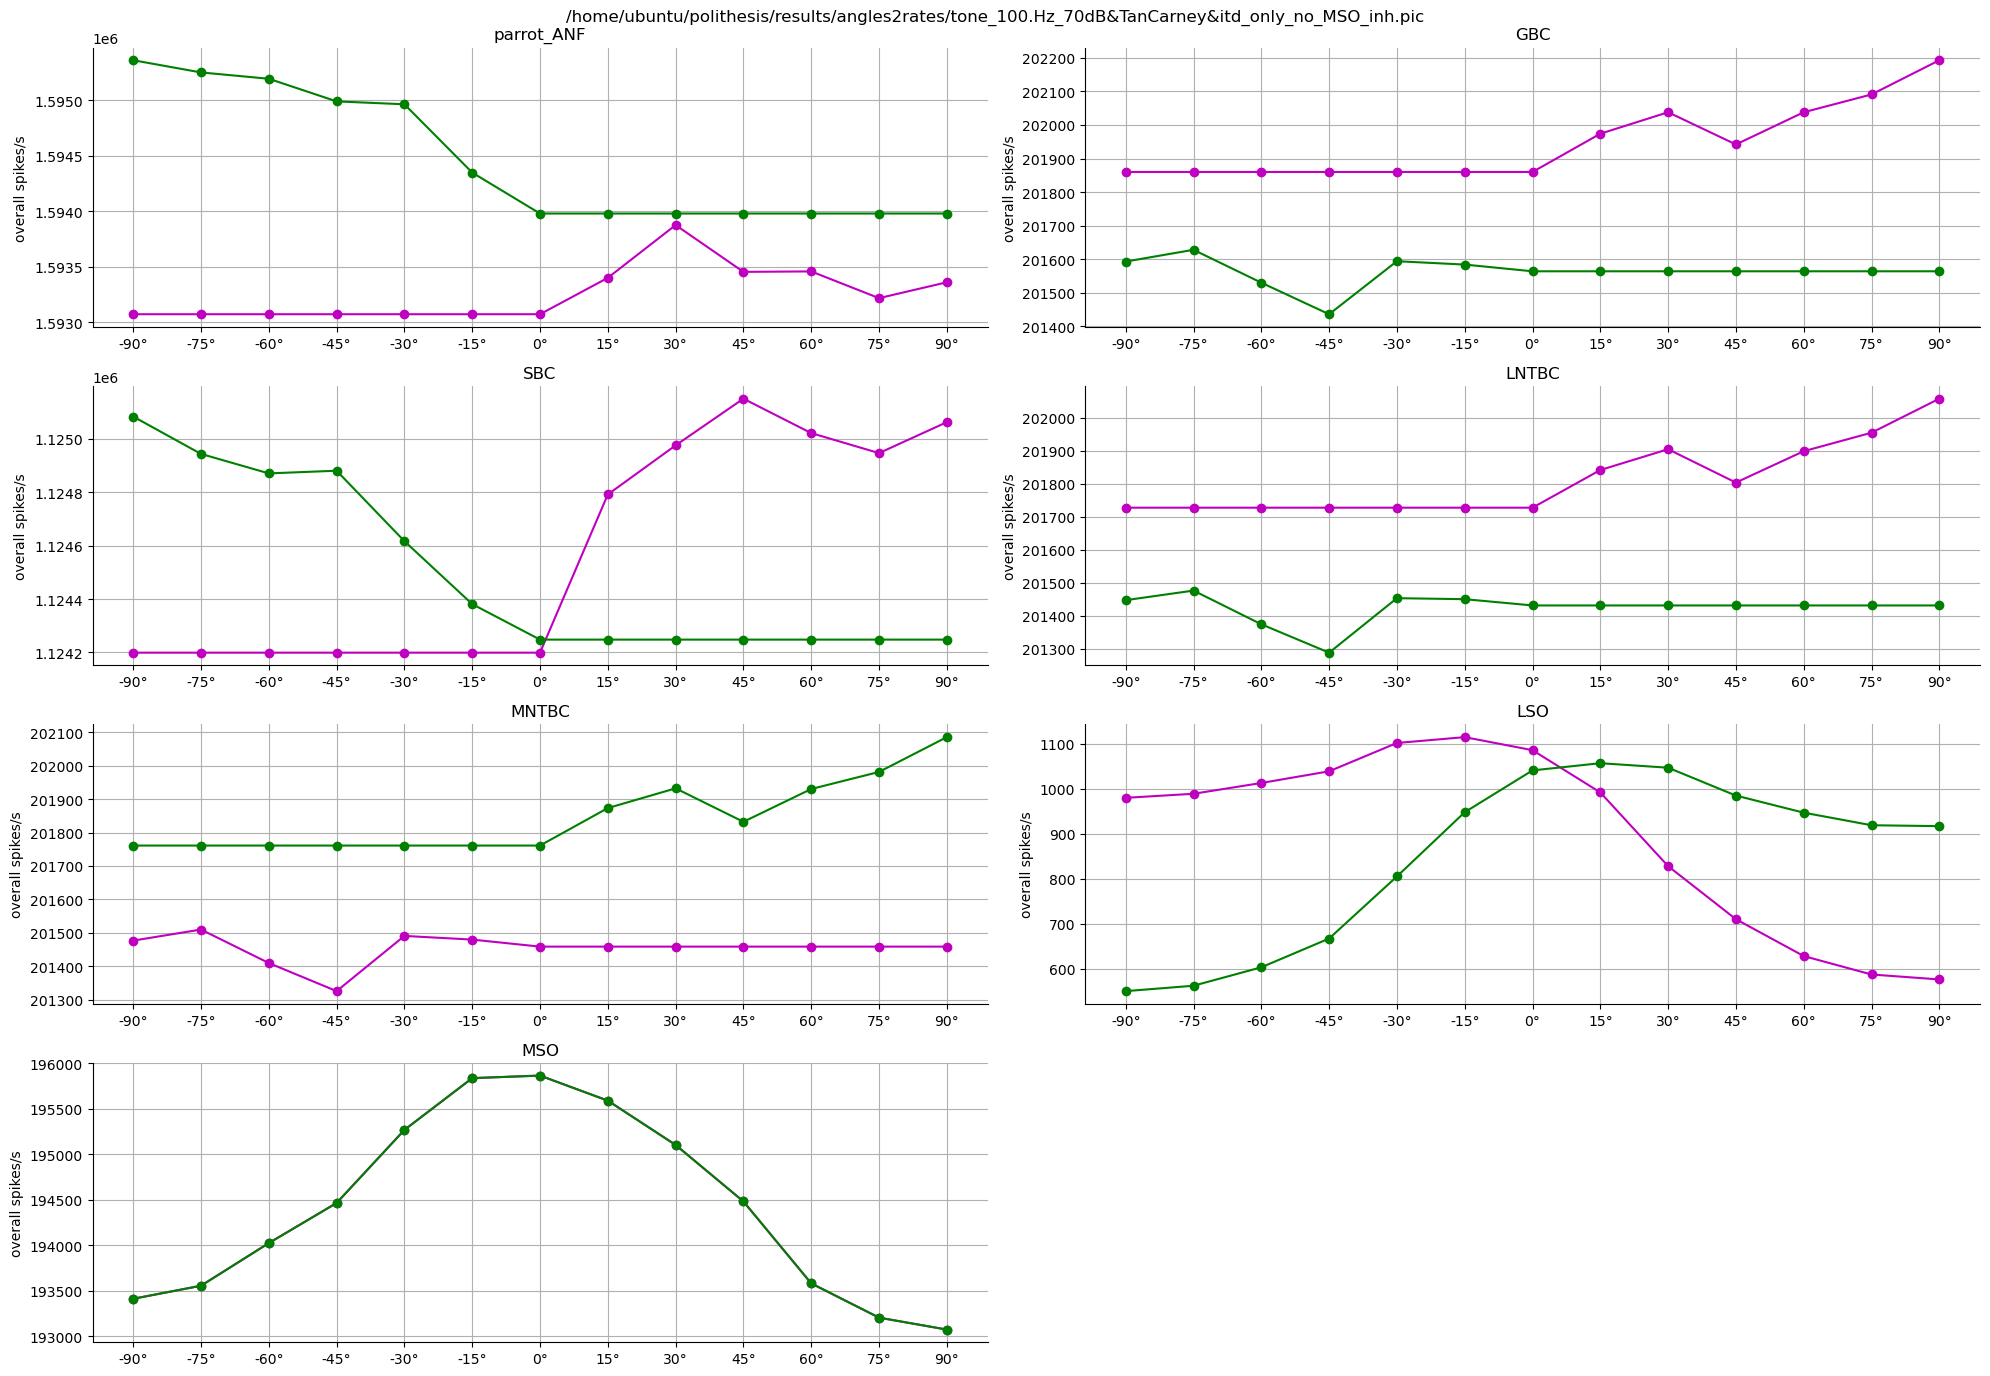

In [55]:
result_path = '/home/ubuntu/polithesis/results/angles2rates/tone_100.Hz_70dB&TanCarney&itd_only_no_MSO_inh.pic'

if not os.path.exists(result_path):
    download_from_gcs(result_path, result_path)

with open(result_path, "rb") as f:
    res = dill.load(f, ignore=True)

draw_rate_vs_angle(
    res,
    result_path,
    rate=False,
    hist_logscale=True,
    show_pops= ["parrot_ANF", "GBC", "SBC", "LNTBC", "MNTBC", "LSO", "MSO"],
    show_hist=False
)

os.unlink(result_path)

<Bucket: sim-results-localization>
<Blob: sim-results-localization, /home/ubuntu/polithesis/results/angles2rates/tone_1.kHz_70dB&TanCarney&ild_only.pic, None>
Downloaded /home/ubuntu/polithesis/results/angles2rates/tone_1.kHz_70dB&TanCarney&ild_only.pic to /home/ubuntu/polithesis/results/angles2rates/tone_1.kHz_70dB&TanCarney&ild_only.pic
2025-03-28 10:29:18,704 [DEBUG]  {'title': '/home/ubuntu/polithesis/results/angles2rates/tone_1.kHz_70dB&TanCarney&ild_only.pic', 'show_pops': ['parrot_ANF', 'GBC', 'SBC', 'LNTBC', 'MNTBC', 'LSO', 'MSO'], 'rate': False, 'hist_logscale': True}
2025-03-28 10:29:18,706 [DEBUG]  simulation time=1. s


pop: 100%|██████████| 7/7 [00:56<00:00,  8.13s/it]


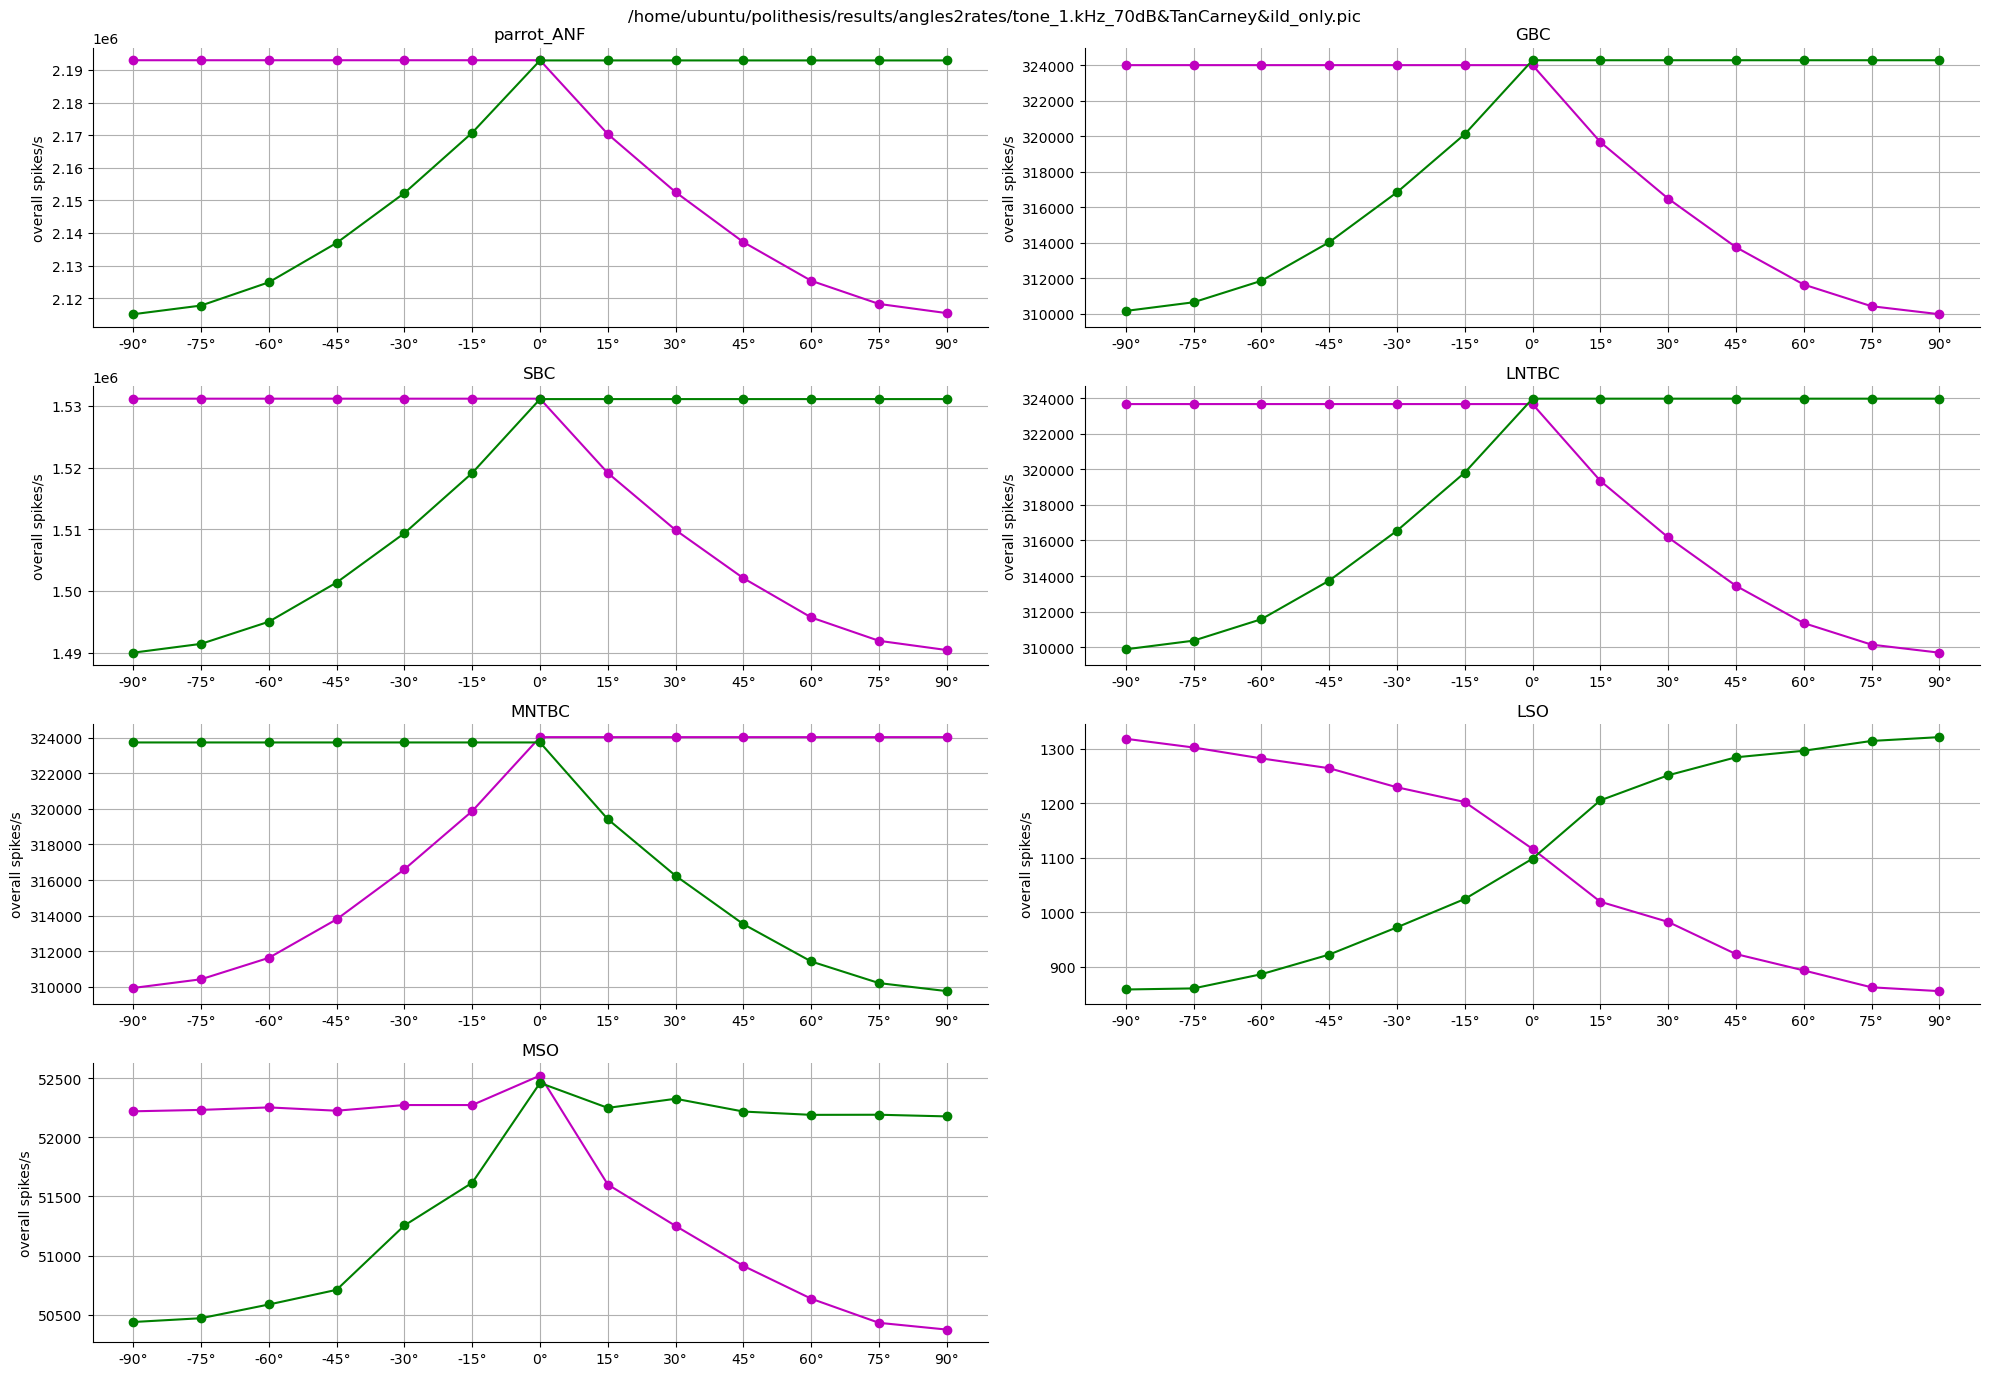

In [14]:
result_path = '/home/ubuntu/polithesis/results/angles2rates/tone_1.kHz_70dB&TanCarney&ild_only.pic'

if not os.path.exists(result_path):
    download_from_gcs(result_path, result_path)

with open(result_path, "rb") as f:
    res = dill.load(f, ignore=True)

draw_rate_vs_angle(
    res,
    result_path,
    rate=False,
    hist_logscale=True,
    show_pops= ["parrot_ANF", "GBC", "SBC", "LNTBC", "MNTBC", "LSO", "MSO"],
    show_hist=False
)

os.unlink(result_path)

<Bucket: sim-results-localization>
<Blob: sim-results-localization, /home/ubuntu/polithesis/results/angles2rates/tone_10.kHz_70dB&TanCarney&subject_1.pic, None>
Downloaded /home/ubuntu/polithesis/results/angles2rates/tone_10.kHz_70dB&TanCarney&subject_1.pic to /home/ubuntu/polithesis/results/angles2rates/tone_10.kHz_70dB&TanCarney&subject_1.pic
2025-03-28 09:50:36,828 [DEBUG]  {'title': '/home/ubuntu/polithesis/results/angles2rates/tone_10.kHz_70dB&TanCarney&subject_1.pic', 'show_pops': ['parrot_ANF', 'GBC', 'SBC', 'LNTBC', 'MNTBC', 'LSO', 'MSO'], 'rate': False, 'hist_logscale': True}
2025-03-28 09:50:36,830 [DEBUG]  simulation time=1. s


pop: 100%|██████████| 7/7 [00:42<00:00,  6.13s/it]


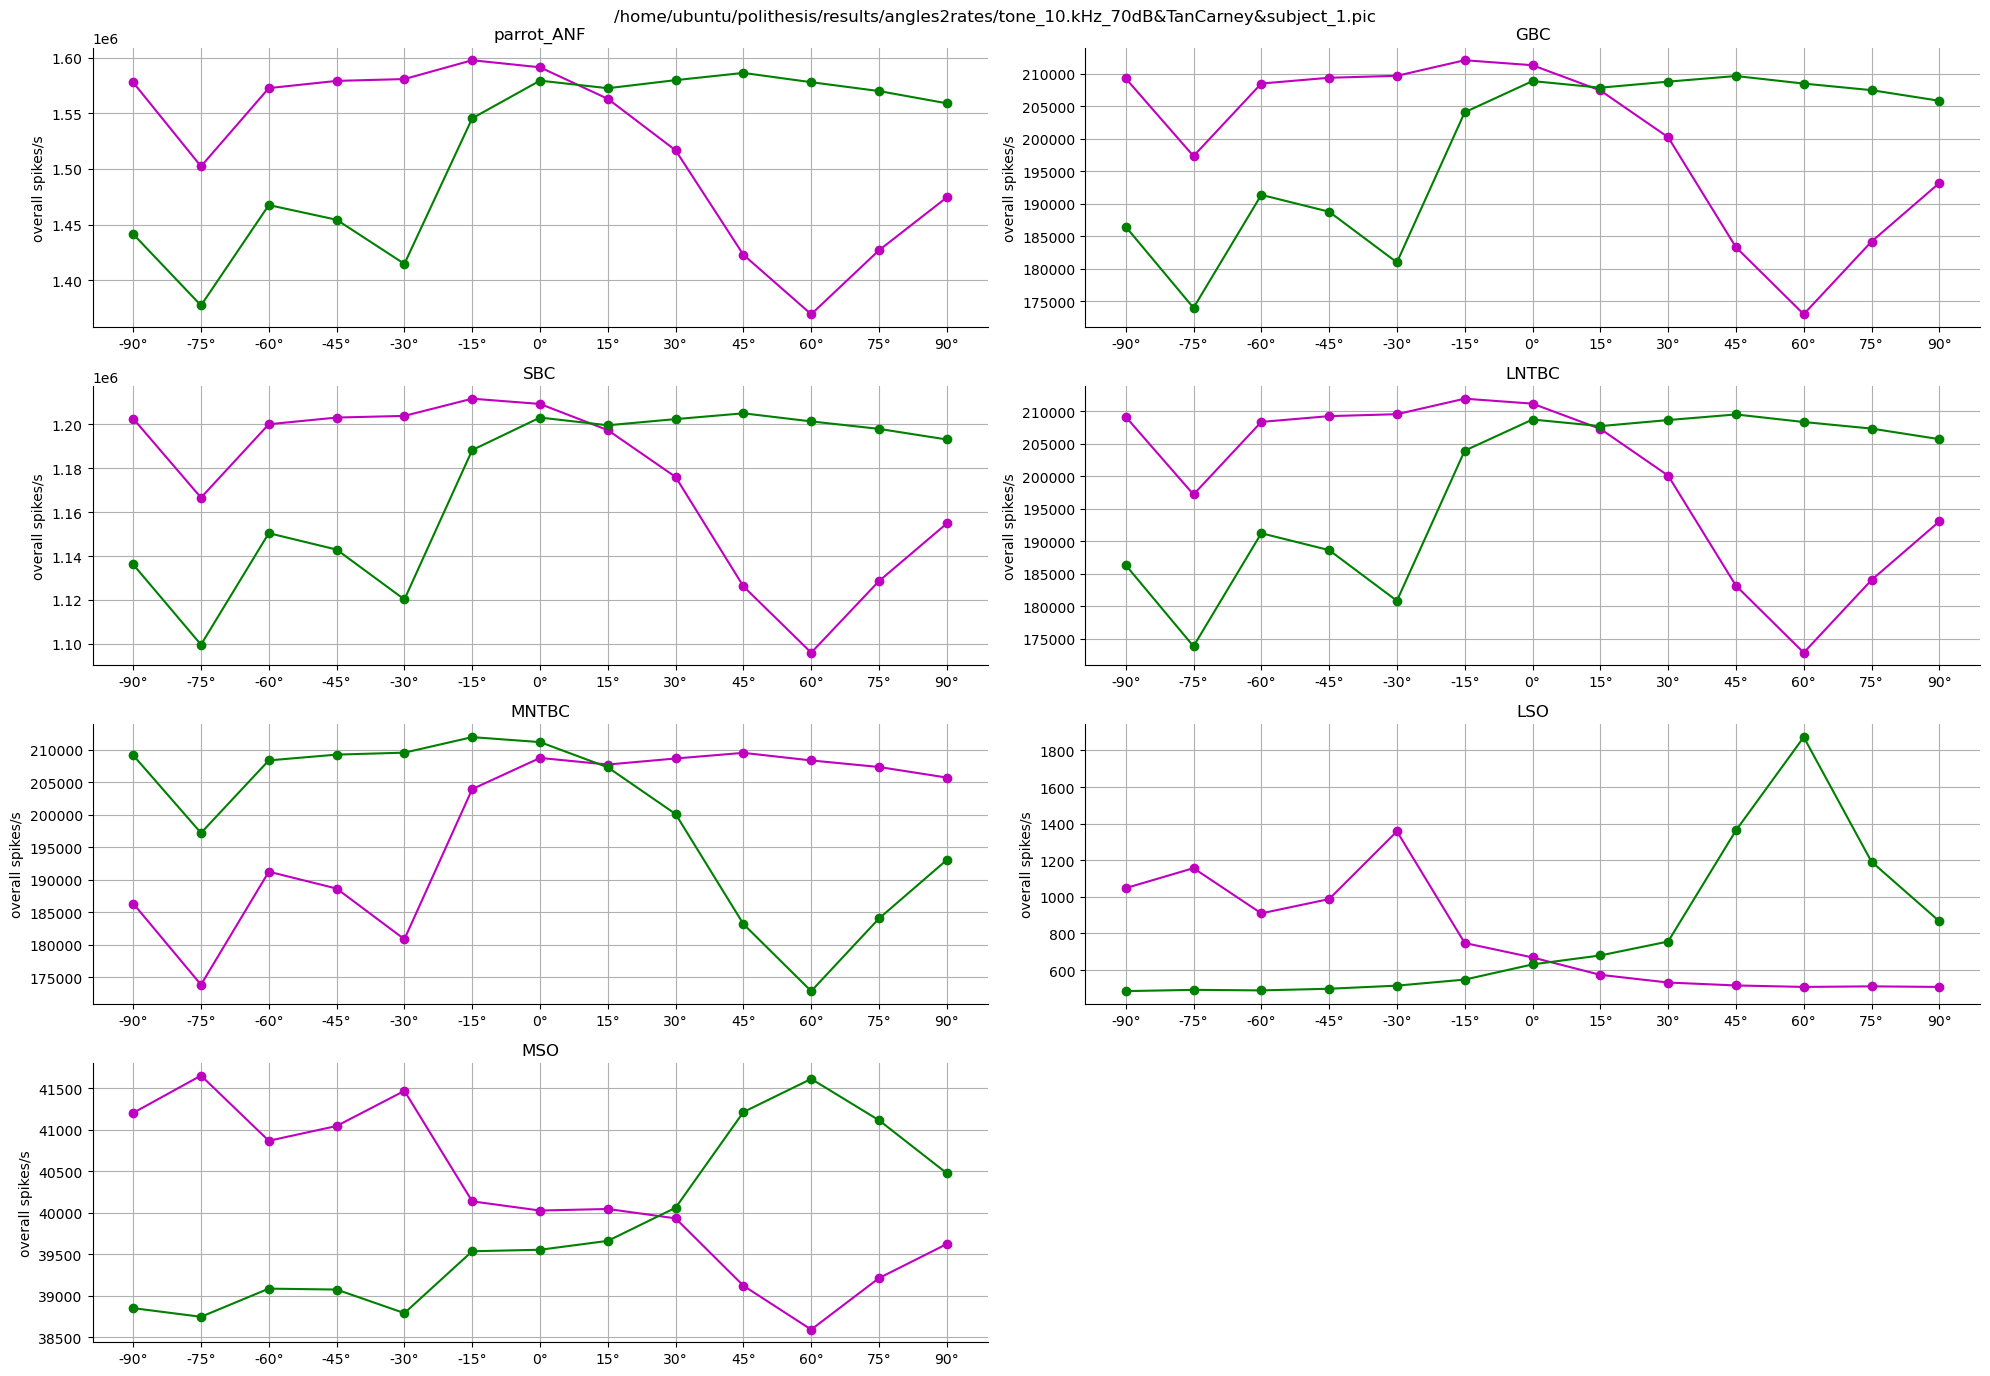

In [9]:
result_path = '/home/ubuntu/polithesis/results/angles2rates/tone_10.kHz_70dB&TanCarney&subject_1.pic'

if not os.path.exists(result_path):
    download_from_gcs(result_path, result_path)

with open(result_path, "rb") as f:
    res = dill.load(f, ignore=True)

draw_rate_vs_angle(
    res,
    result_path,
    rate=False,
    hist_logscale=True,
    show_pops= ["parrot_ANF", "GBC", "SBC", "LNTBC", "MNTBC", "LSO", "MSO"],
    show_hist=False
)

os.unlink(result_path)

<Bucket: sim-results-localization>
<Blob: sim-results-localization, /home/ubuntu/polithesis/results/angles2rates/tone_0.1.kHz_70dB&TanCarney&subject_1.pic, None>
Downloaded /home/ubuntu/polithesis/results/angles2rates/tone_0.1.kHz_70dB&TanCarney&subject_1.pic to /home/ubuntu/polithesis/results/angles2rates/tone_0.1.kHz_70dB&TanCarney&subject_1.pic
2025-03-28 09:46:01,295 [DEBUG]  {'title': '/home/ubuntu/polithesis/results/angles2rates/tone_0.1.kHz_70dB&TanCarney&subject_1.pic', 'show_pops': ['parrot_ANF', 'GBC', 'SBC', 'LNTBC', 'MNTBC', 'LSO', 'MSO'], 'rate': False, 'hist_logscale': True}
2025-03-28 09:46:01,309 [DEBUG]  simulation time=1. s


pop: 100%|██████████| 7/7 [00:36<00:00,  5.28s/it]


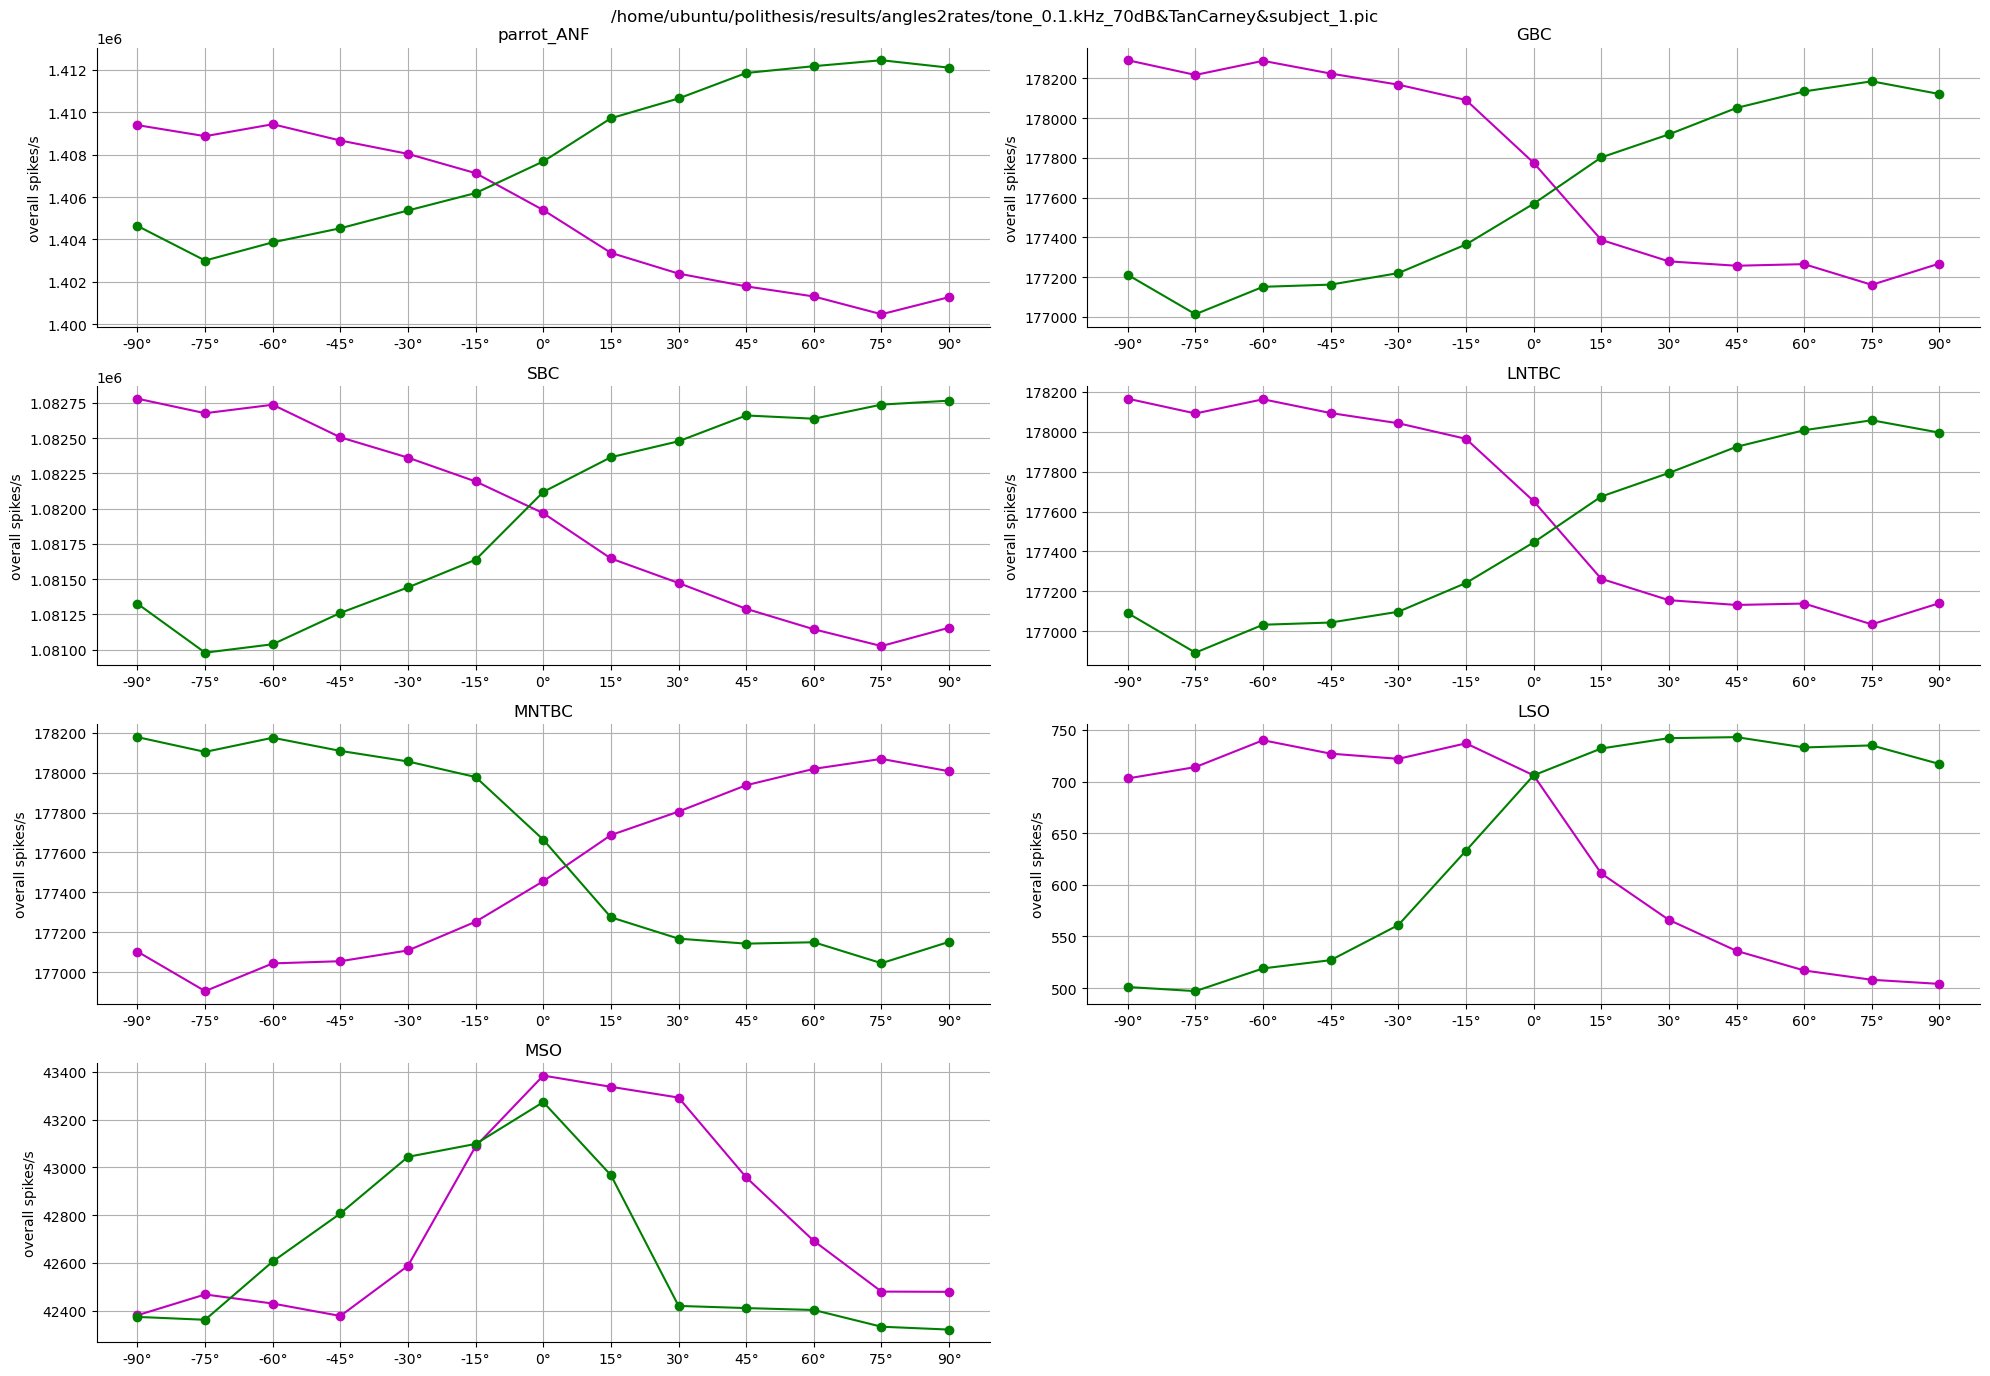

In [ ]:
result_path = '/home/ubuntu/polithesis/results/angles2rates/tone_0.1.kHz_70dB&TanCarney&subject_1.pic'

if not os.path.exists(result_path):
    download_from_gcs(result_path, result_path)

with open(result_path, "rb") as f:
    res = dill.load(f, ignore=True)

draw_rate_vs_angle(
    res,
    result_path,
    rate=False,
    hist_logscale=True,
    show_pops= ["parrot_ANF", "GBC", "SBC", "LNTBC", "MNTBC", "LSO", "MSO"],
    show_hist=False
)

os.unlink(result_path)

2025-03-28 09:53:28,213 [DEBUG]  {'title': '/home/ubuntu/polithesis/results/angles2rates/tone_1.kHz_70dB&TanCarney&subject_1.pic', 'show_pops': ['parrot_ANF', 'GBC', 'SBC', 'LNTBC', 'MNTBC', 'LSO', 'MSO'], 'rate': False, 'hist_logscale': True}
2025-03-28 09:53:28,229 [DEBUG]  simulation time=1. s


pop: 100%|██████████| 7/7 [00:46<00:00,  6.63s/it]


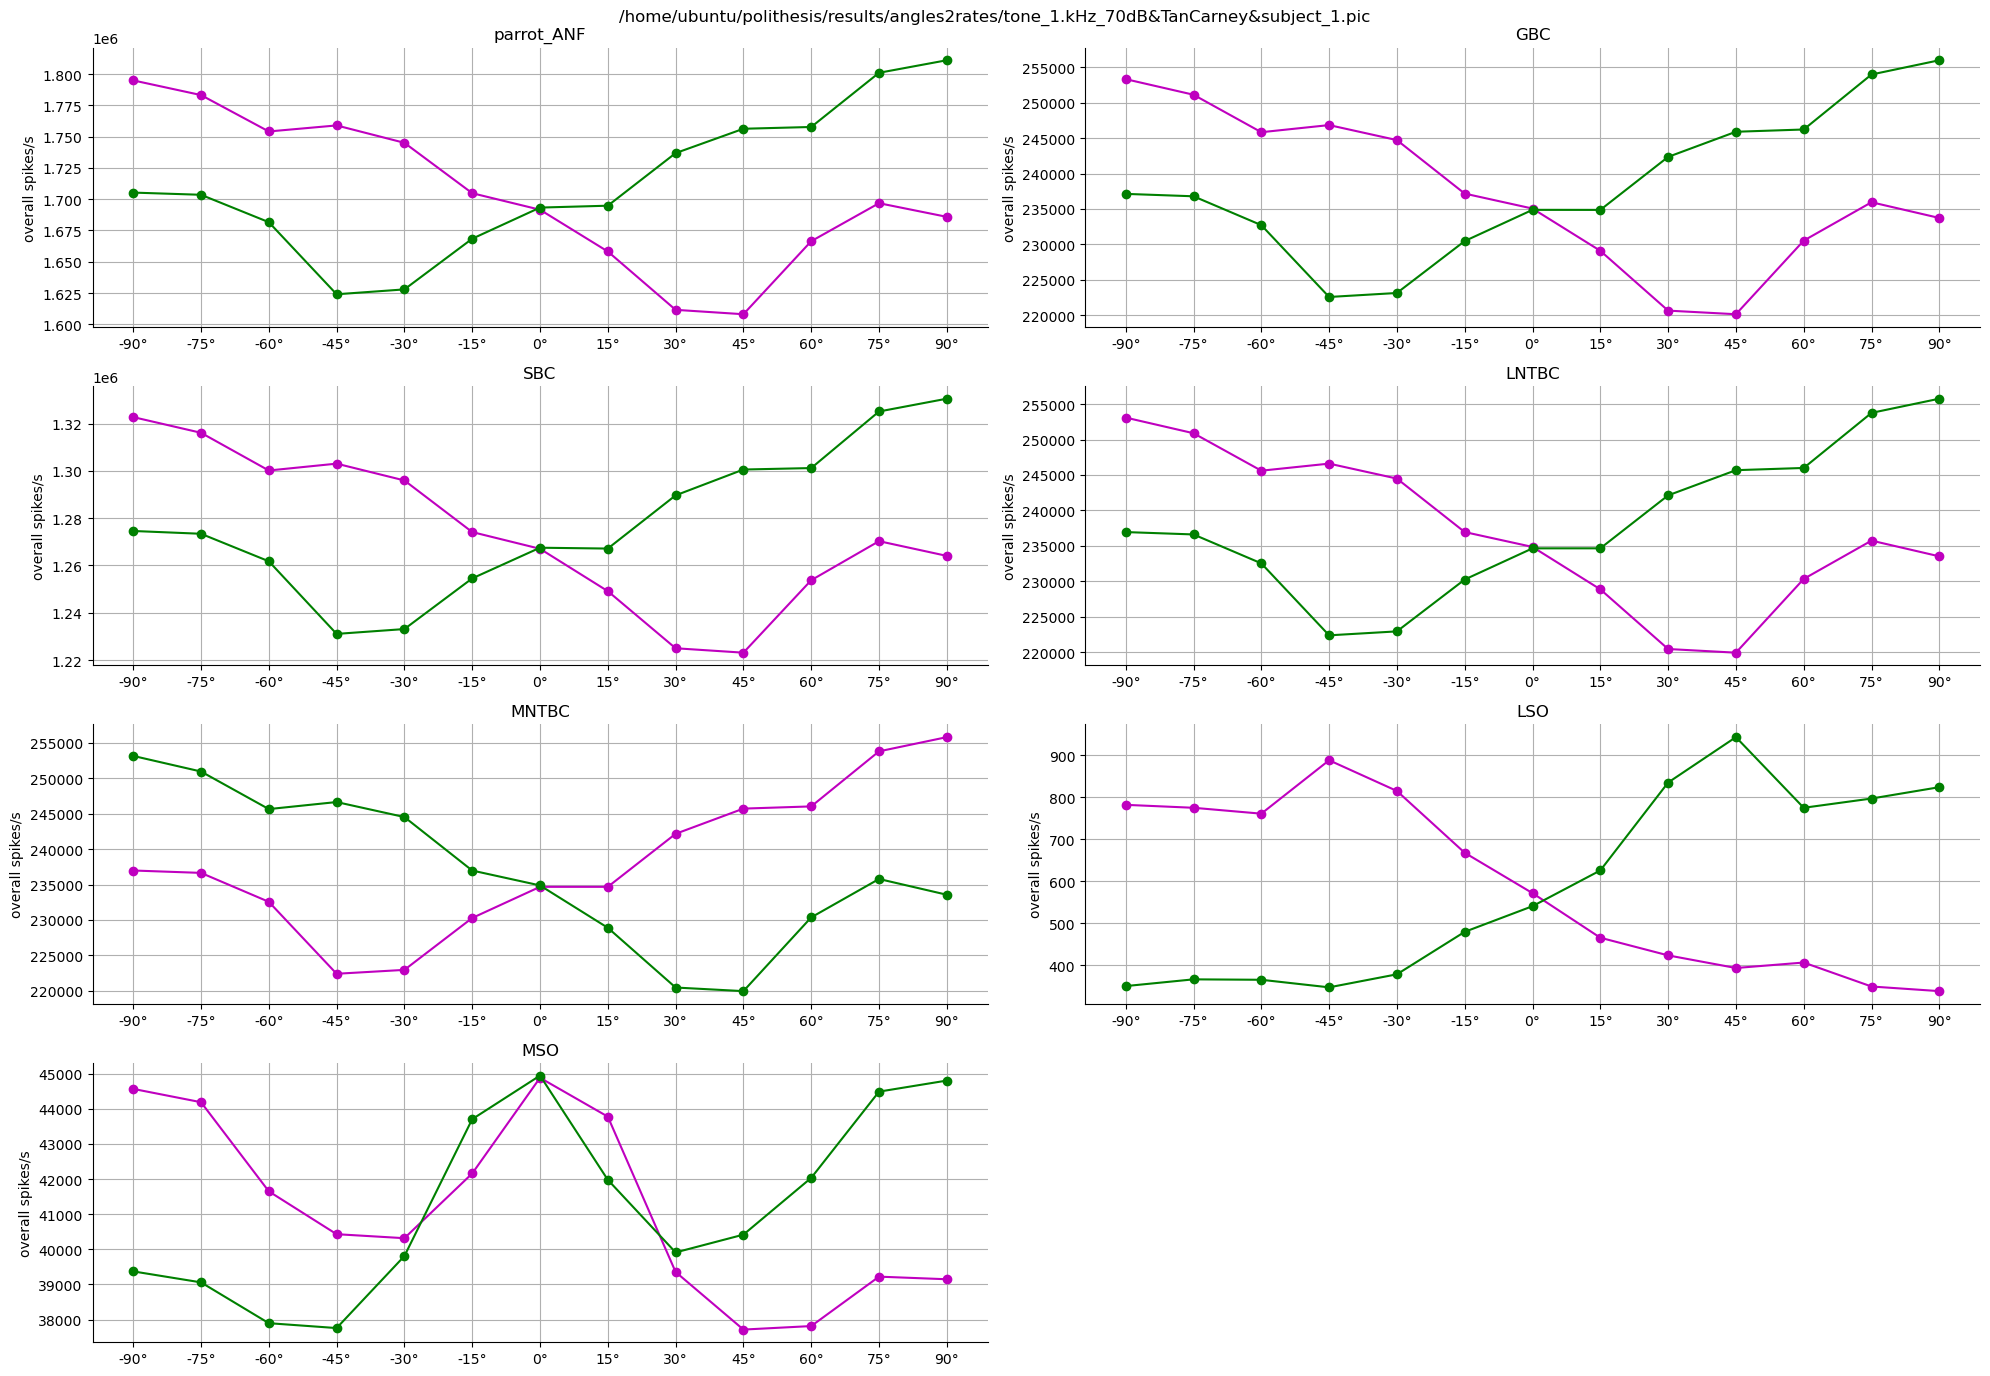

In [10]:
result_path = '/home/ubuntu/polithesis/results/angles2rates/tone_1.kHz_70dB&TanCarney&subject_1.pic'

if not os.path.exists(result_path):
    download_from_gcs(result_path, result_path)

with open(result_path, "rb") as f:
    res = dill.load(f, ignore=True)

draw_rate_vs_angle(
    res,
    result_path,
    rate=False,
    hist_logscale=True,
    show_pops= ["parrot_ANF", "GBC", "SBC", "LNTBC", "MNTBC", "LSO", "MSO"],
    show_hist=False
)

os.unlink(result_path)

2025-03-28 10:54:28,265 [DEBUG]  {'title': '/home/ubuntu/polithesis/results/angles2rates/tone_1.kHz_70dB&TanCarney&subject_1_no_MSO_inh.pic', 'show_pops': ['parrot_ANF', 'GBC', 'SBC', 'LNTBC', 'MNTBC', 'LSO', 'MSO'], 'rate': False, 'hist_logscale': True}
2025-03-28 10:54:28,267 [DEBUG]  simulation time=1. s


pop: 100%|██████████| 7/7 [00:47<00:00,  6.76s/it]


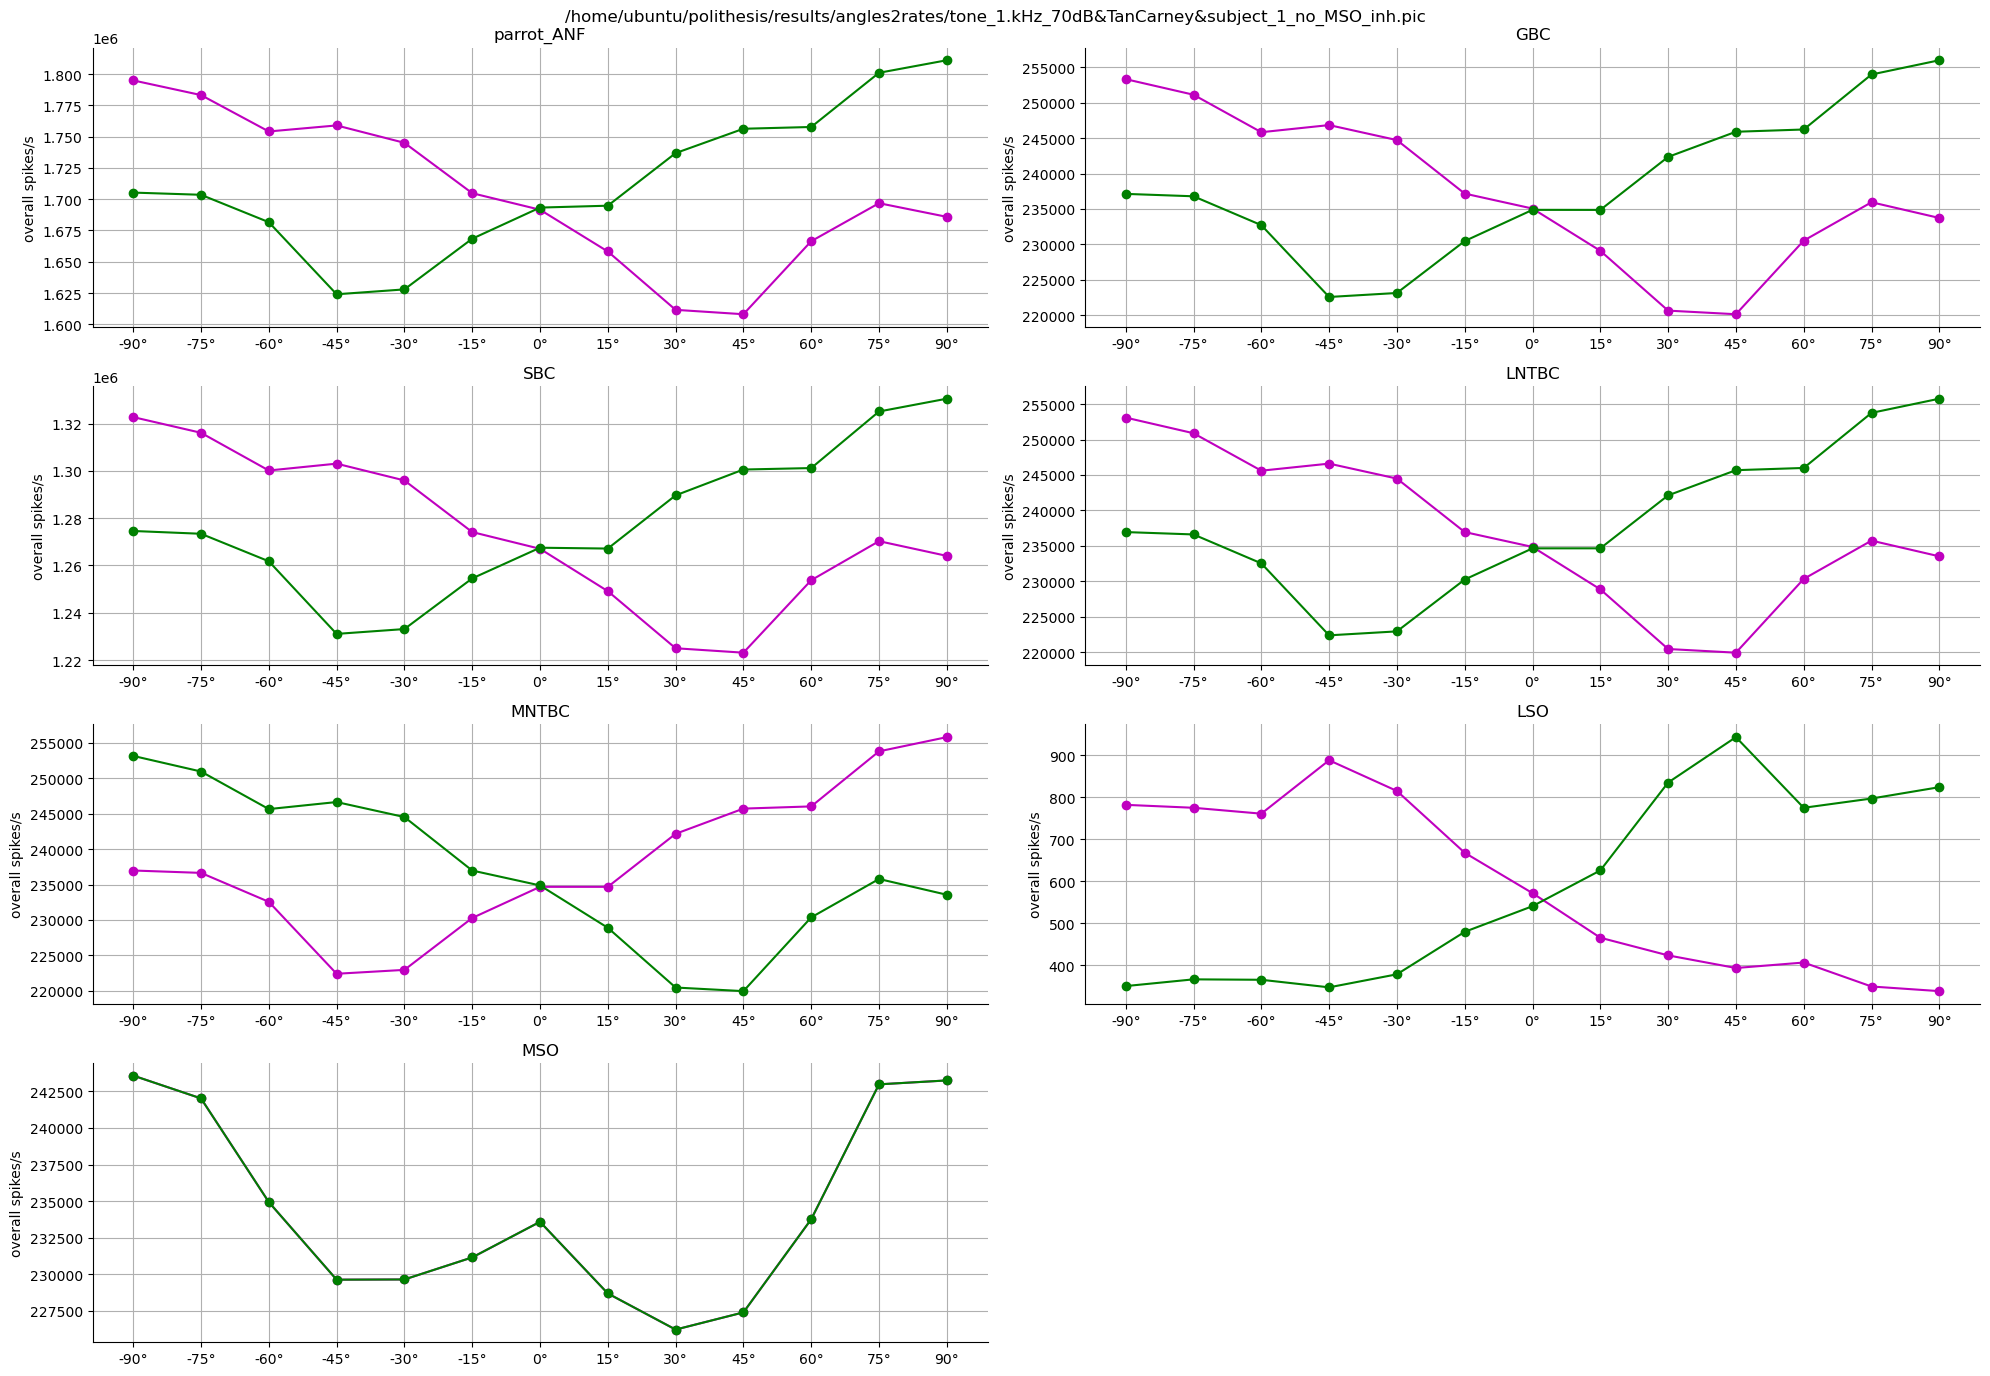

In [23]:
result_path = '/home/ubuntu/polithesis/results/angles2rates/tone_1.kHz_70dB&TanCarney&subject_1_no_MSO_inh.pic'

if not os.path.exists(result_path):
    download_from_gcs(result_path, result_path)

with open(result_path, "rb") as f:
    res = dill.load(f, ignore=True)

draw_rate_vs_angle(
    res,
    result_path,
    rate=False,
    hist_logscale=True,
    show_pops= ["parrot_ANF", "GBC", "SBC", "LNTBC", "MNTBC", "LSO", "MSO"],
    show_hist=False
)

os.unlink(result_path)

<Bucket: sim-results-localization>
<Blob: sim-results-localization, /home/ubuntu/polithesis/results/angles2rates/tone_1.kHz_70dB&TanCarney&subject_2_no_MSO_inh.pic, None>
Downloaded /home/ubuntu/polithesis/results/angles2rates/tone_1.kHz_70dB&TanCarney&subject_2_no_MSO_inh.pic to /home/ubuntu/polithesis/results/angles2rates/tone_1.kHz_70dB&TanCarney&subject_2_no_MSO_inh.pic
2025-03-28 10:55:45,756 [DEBUG]  {'title': '/home/ubuntu/polithesis/results/angles2rates/tone_1.kHz_70dB&TanCarney&subject_2_no_MSO_inh.pic', 'show_pops': ['parrot_ANF', 'GBC', 'SBC', 'LNTBC', 'MNTBC', 'LSO', 'MSO'], 'rate': False, 'hist_logscale': True}
2025-03-28 10:55:45,758 [DEBUG]  simulation time=1. s


pop: 100%|██████████| 7/7 [00:53<00:00,  7.58s/it]


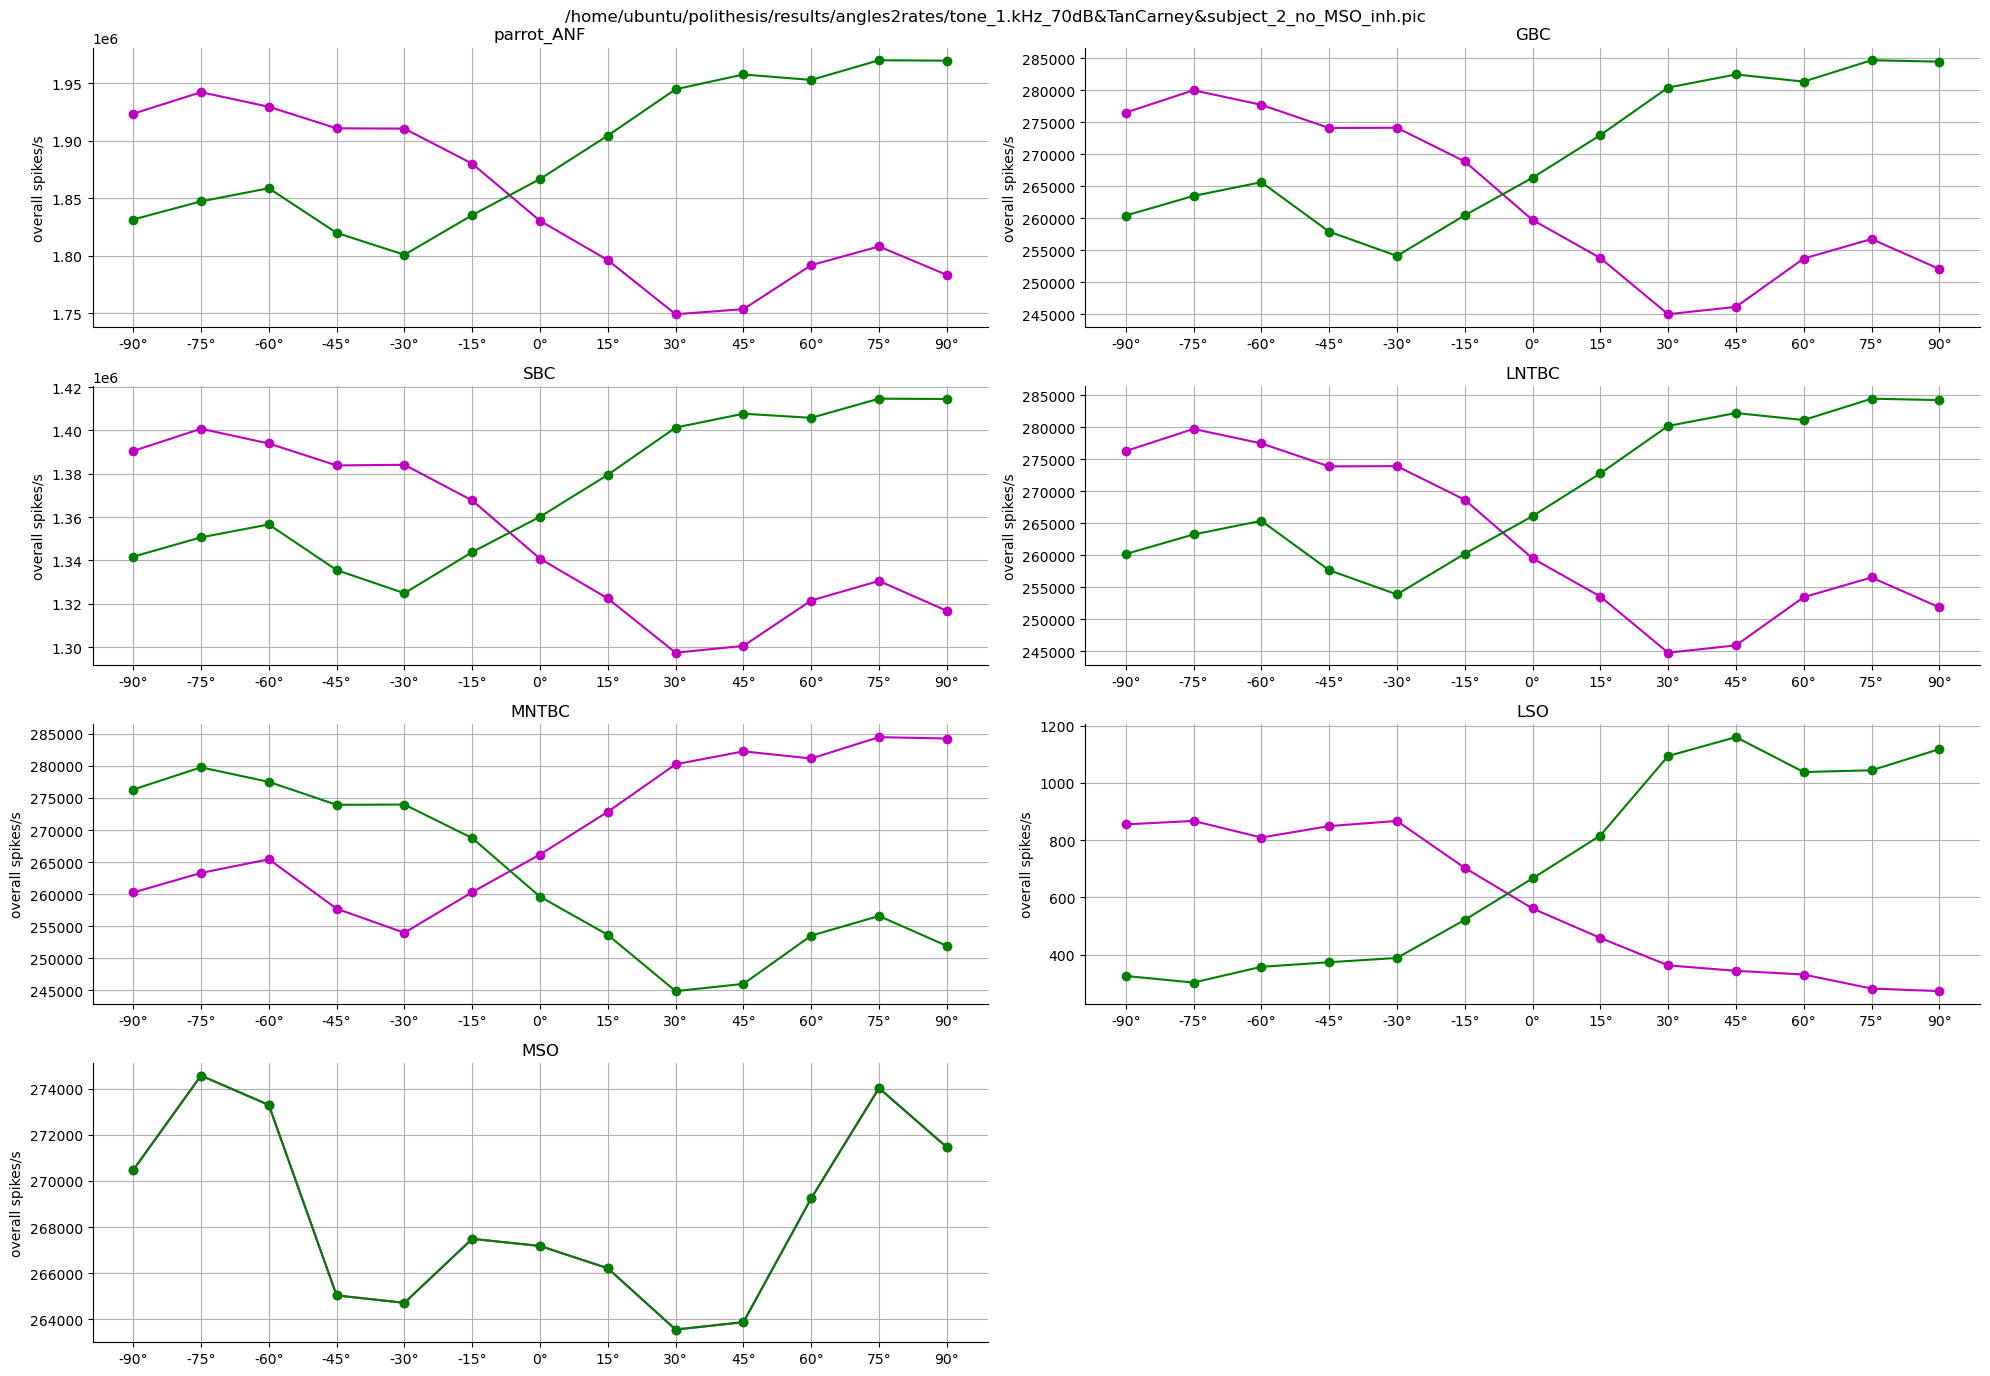

In [24]:
result_path = '/home/ubuntu/polithesis/results/angles2rates/tone_1.kHz_70dB&TanCarney&subject_2_no_MSO_inh.pic'

if not os.path.exists(result_path):
    download_from_gcs(result_path, result_path)

with open(result_path, "rb") as f:
    res = dill.load(f, ignore=True)

draw_rate_vs_angle(
    res,
    result_path,
    rate=False,
    hist_logscale=True,
    show_pops= ["parrot_ANF", "GBC", "SBC", "LNTBC", "MNTBC", "LSO", "MSO"],
    show_hist=False
)

os.unlink(result_path)